In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [76]:
data=pd.read_csv('/content/mission6.csv')
data.head(10)

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,132,11,Yes,Yes,No
1,69,38.4,123,12,No,No,No
2,46,34.1,111,2,Yes,No,Yes
3,32,25.5,149,3,Yes,Yes,Yes
4,60,30.8,111,2,Yes,No,Yes
5,25,29.7,147,0,No,Yes,No
6,78,39.2,134,0,Yes,Yes,No
7,38,36.7,154,11,No,No,Yes
8,56,34.6,135,11,Yes,No,Yes
9,75,30.1,96,13,No,Yes,No


In [77]:
data.isna().sum()

,0
Age,0
BMI,0
Blood Pressure,0
Physical Activity (hours/week),0
Family History,0
Smoking Status,0
Diabetes Risk,0


In [78]:
data.describe()

,Age,BMI,Blood Pressure,Physical Activity (hours/week)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.398000,28.983400,118.113000,7.337000
std,19.171676,6.073888,22.256945,4.472968
min,19.000000,18.500000,80.000000,0.000000
25%,34.000000,24.000000,99.000000,3.000000
50%,50.000000,28.300000,114.500000,8.000000
75%,69.000000,33.800000,138.000000,12.000000
max,79.000000,40.000000,159.000000,14.000000


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1000 non-null   int64  
 1   BMI                             1000 non-null   float64
 2   Blood Pressure                  1000 non-null   int64  
 3   Physical Activity (hours/week)  1000 non-null   int64  
 4   Family History                  1000 non-null   object 
 5   Smoking Status                  1000 non-null   object 
 6   Diabetes Risk                   1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [80]:
le={}
encoded=['Family History','Smoking Status']
for col in encoded:
  le[col]=LabelEncoder()
  data[col]=le[col].fit_transform(data[col])

In [81]:
data['Diabetes Risk']=data['Diabetes Risk'].map({'No':0,'Yes':1})

In [82]:
sc=StandardScaler()
scall=['Age','BMI','Blood Pressure','Physical Activity (hours/week)']
data[scall]=sc.fit_transform(data[scall])

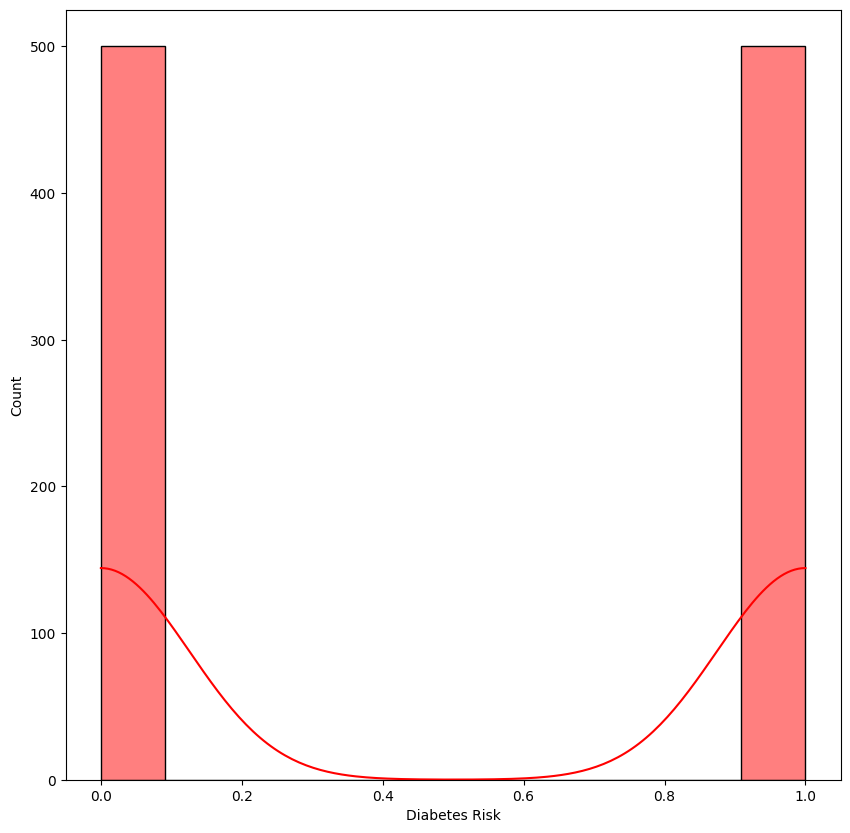

In [83]:
plt.figure(figsize=(10,10))
sns.histplot(data['Diabetes Risk'],color='red',kde=True)
plt.title=('distribation of Diabates Risk')
plt.xlabel="Diabetes Risk"
plt.y_label="count"

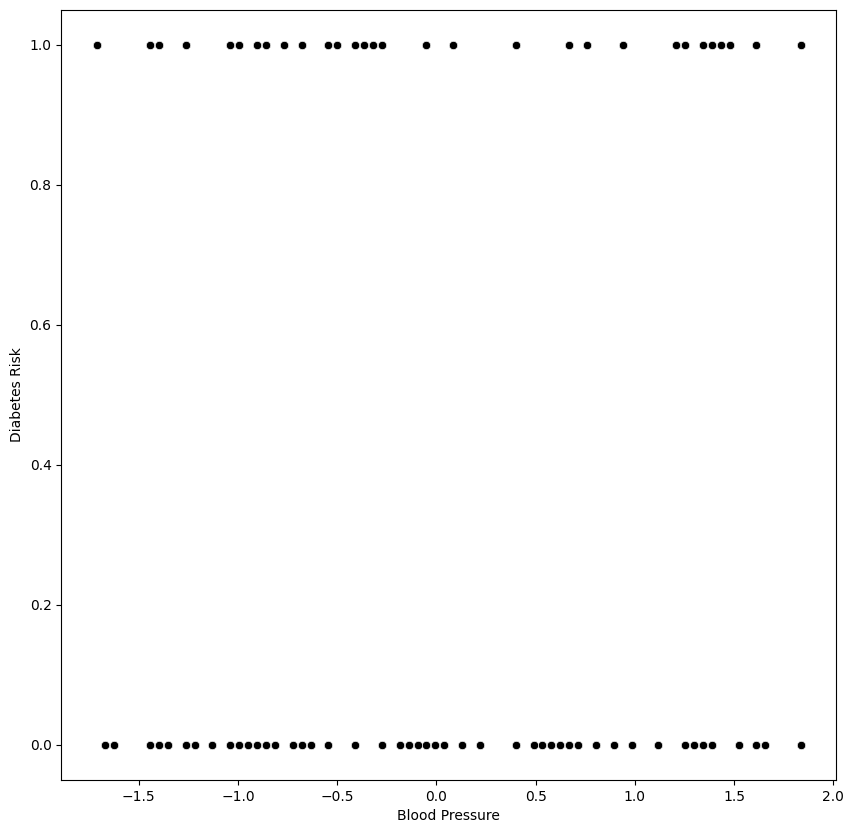

In [84]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Blood Pressure'],y=data['Diabetes Risk'],color='black')
plt.title=('Relation betwenn Blood pressure and Diabetes')
plt.xlabel="blood"
plt.y_label="Risk"

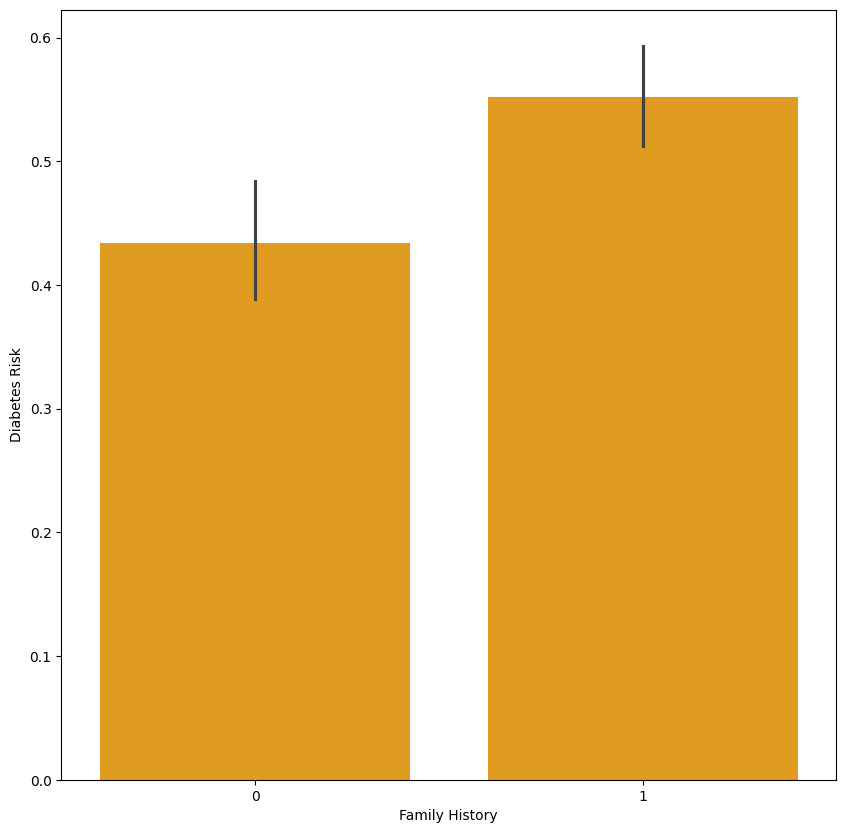

In [85]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['Family History'],y=data['Diabetes Risk'],color='orange')
plt.title=('Impact family on Diabetes Risk')
plt.xlabel="family"
plt.y_label="Risk"

In [86]:
x=data.drop('Diabetes Risk',axis=1)
y=data['Diabetes Risk']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [87]:
lr=LogisticRegression()
de=DecisionTreeClassifier()


In [88]:
lr.fit(x_train,y_train)


LogisticRegression()

In [89]:
de.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
y_pred_lr=lr.predict(x_test)
y_pred_de=de.predict(x_test)

In [91]:
print("Accurcy_score",accuracy_score(y_test,y_pred_lr))
print("confusion matrix",confusion_matrix(y_test,y_pred_lr))
print("Clasifaction Report",classification_report(y_test,y_pred_lr))




Accurcy_score 0.55
confusion matrix [[57 39]
 [51 53]]
Clasifaction Report               precision    recall  f1-score   support

           0       0.53      0.59      0.56        96
           1       0.58      0.51      0.54       104

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



In [92]:
print("Accurcy_score",accuracy_score(y_test,y_pred_de))
print("confusion matrix",confusion_matrix(y_test,y_pred_de))
print("Clasifaction Report",classification_report(y_test,y_pred_de))




Accurcy_score 1.0
confusion matrix [[ 96   0]
 [  0 104]]
Clasifaction Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Axes: xlabel='Diabetes Risk'>

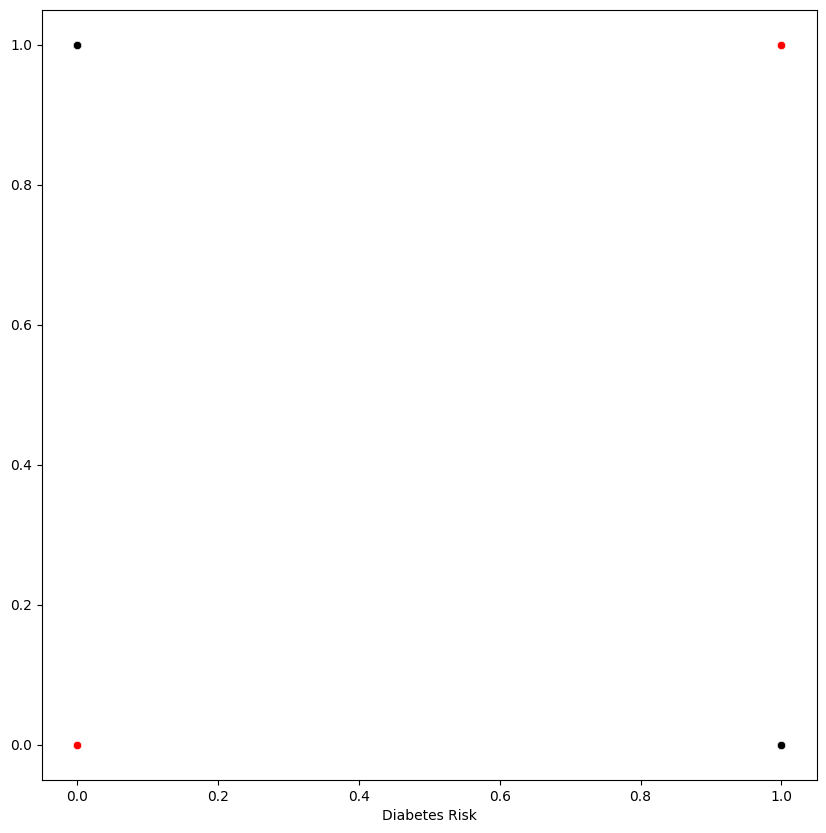

In [93]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=y_pred_lr,color='black')
sns.scatterplot(x=y_test,y=y_pred_de,color='red')


In [94]:
grid_params={
    'max_iter':[1000,2000,3000,400]

}
grid_model=GridSearchCV(lr,grid_params,cv=5)
grid_model.fit(x_train,y_train)
print("best_parameter",grid_model.best_params_)
print("best_score",grid_model.best_score_)

best_parameter {'max_iter': 1000}
best_score 0.49750000000000005


In [95]:
y_pred_grid=grid_model.best_estimator_.predict(x_test)

In [96]:
print("Accurcy_score",accuracy_score(y_test,y_pred_grid))
print("confusion matrix",confusion_matrix(y_test,y_pred_grid))
print("Clasifaction Report",classification_report(y_test,y_pred_grid))




Accurcy_score 0.55
confusion matrix [[57 39]
 [51 53]]
Clasifaction Report               precision    recall  f1-score   support

           0       0.53      0.59      0.56        96
           1       0.58      0.51      0.54       104

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



In [97]:
random_params={
    'max_depth':[10,20,30,40]

}
random_model=RandomizedSearchCV(de,random_params,cv=5)
random_model.fit(x_train,y_train)
print("best_parameter",random_model.best_params_)
print("best_score",random_model.best_score_)

best_parameter {'max_depth': 20}
best_score 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [98]:
y_pred_random=random_model.best_estimator_.predict(x_test)

In [99]:
print("Accurcy_score",accuracy_score(y_test,y_pred_random))
print("confusion matrix",confusion_matrix(y_test,y_pred_random))
print("Clasifaction Report",classification_report(y_test,y_pred_random))




Accurcy_score 1.0
confusion matrix [[ 96   0]
 [  0 104]]
Clasifaction Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [100]:
pip install gradio

In [101]:
import gradio as gr

In [102]:
data.head(1)

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,0.292348,-0.326709,0.624252,0.819329,1,1,0


In [105]:
def Diabetes(Age,	BMI	,Blood_Pressure	,Physical_Activity ,	Family_History	,Smoking_Status	):
  try:
    input_data=pd.DataFrame({
        'Age':[Age],
        'BMI':[BMI],
        'Blood Pressure':[Blood_Pressure],
        'Physical Activity (hours/week)':[Physical_Activity],
        'Family History':[Family_History],
        'Smoking Status':[Smoking_Status],
 })
    for col in encoded:
      input_data[col]=le[col].transform(input_data[col])
    input_data[scall]=sc.transform(input_data[scall])
    predication=de.predict(input_data)
    if predication[0] ==0:
      return "NO"
    else:
      return "Yes"
    return f"he have diabetes or not: ${predication[0]:,.2f}"
  except Exception as e:
    return str(e)
gr.Interface(
    fn=Diabetes,
    inputs=[
        gr.Number(label='Age'),
        gr.Number(label='BMI'),
        gr.Number(label='Blood Pressure'),
        gr.Number(label='Physical Activity (hours/week)'),
        gr.Dropdown(["Yes",'No'],label='Family_History'),
        gr.Dropdown(["Yes",'No'],label='Smoking Status'),


    ],
    outputs=gr.Textbox(label="predication"),
    title="clasifaction have diabtes or not"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://98c61c42a3750a958b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
